In [4]:
# from openmesh import *
%matplotlib inline
import numpy as np
import os
from tqdm import tqdm
from obj2verts import *
from objSlicer import *
# import itertools
import matplotlib.pyplot as plt
import numpy as np
import meshcut
from mpl_toolkits import mplot3d


In [2]:
# FILE_PATH = os.getcwd()+"./data"
# FILE_PATH = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train', '1.obj')
# FILE_PATH

'/home/pascal/3D_slAIcer/data/coseg/coseg_aliens/train/1.obj'

In [110]:
np.array([px, py]).shape

(2, 100)

# Slices (labels)

94.obj


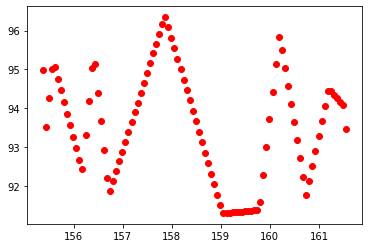

141.obj


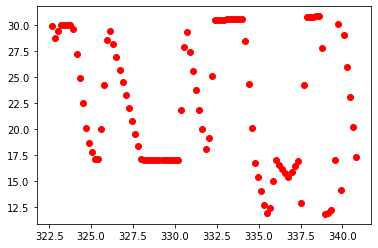

115.obj


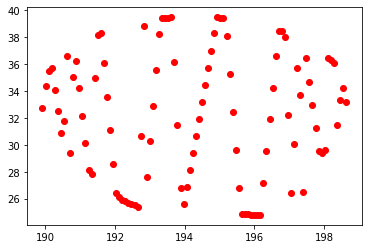

108.obj


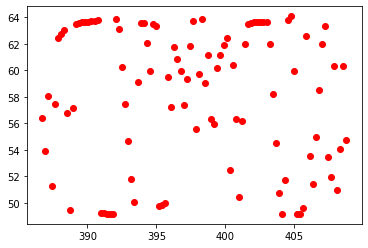

155.obj


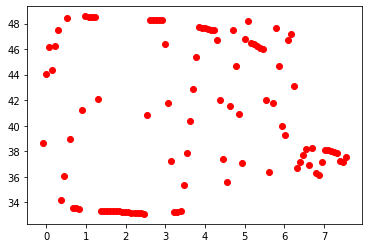

59.obj


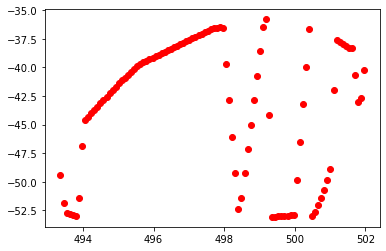

193.obj


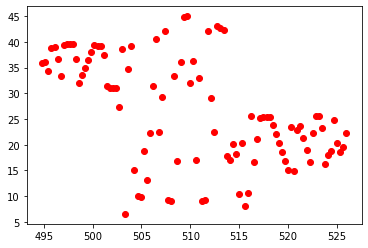

158.obj


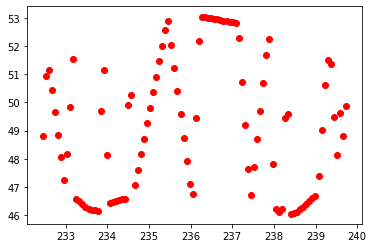

181.obj


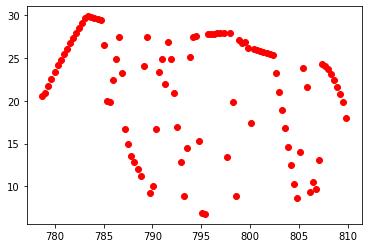

122.obj


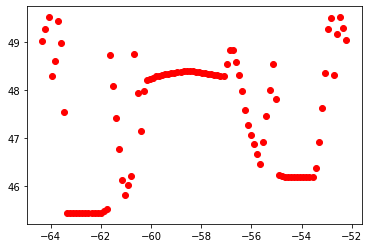

116.obj


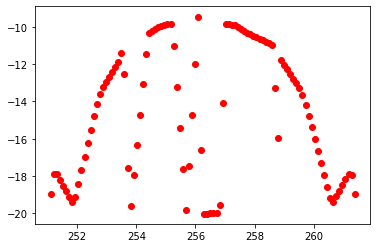

68.obj


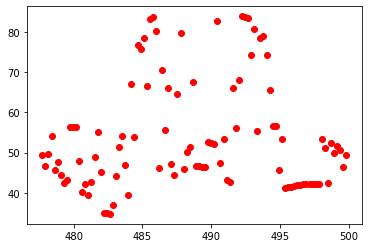

57.obj


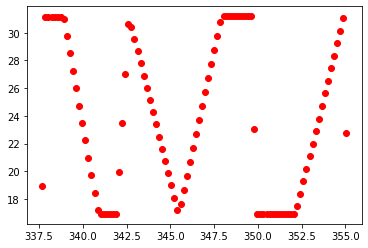

88.obj


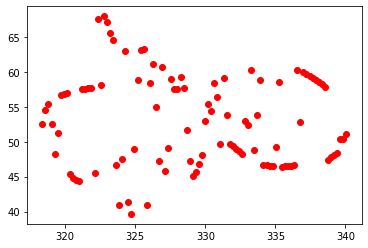

138.obj


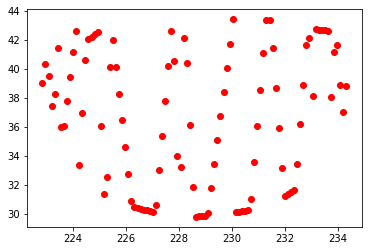

152.obj


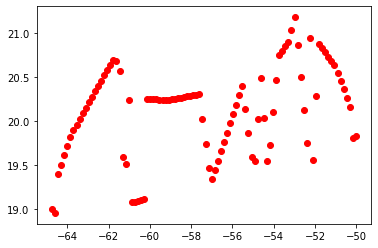

4.obj


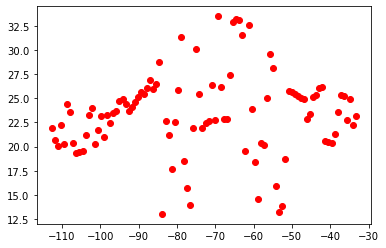

113.obj


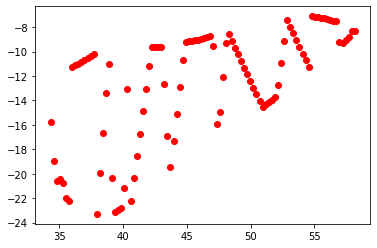

8.obj


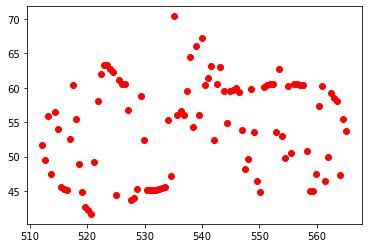

66.obj


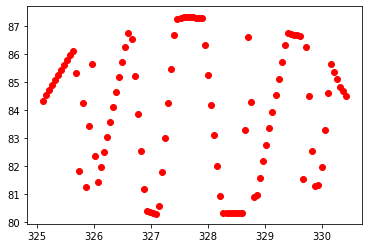

48.obj


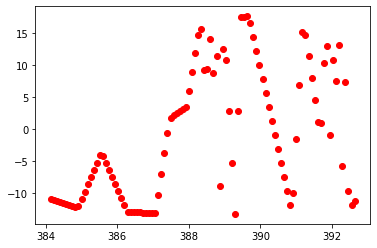

74.obj


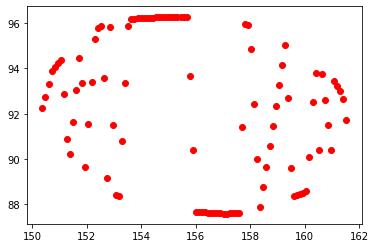

81.obj


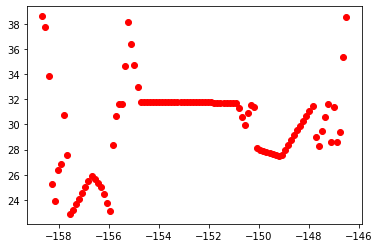

67.obj


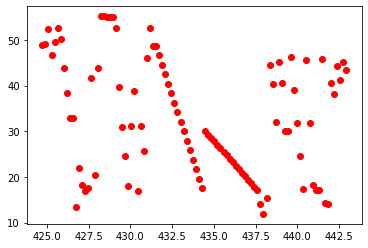

27.obj


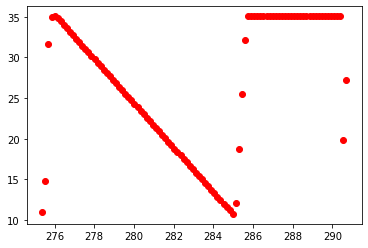

164.obj


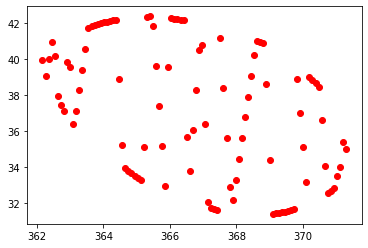

175.obj


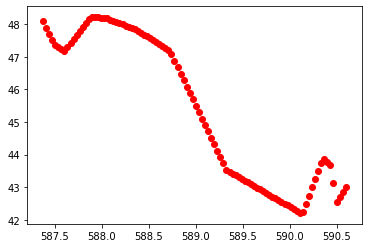

46.obj


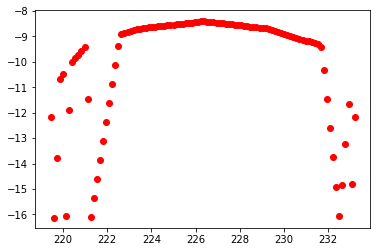

96.obj


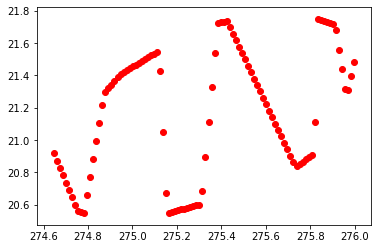

16.obj


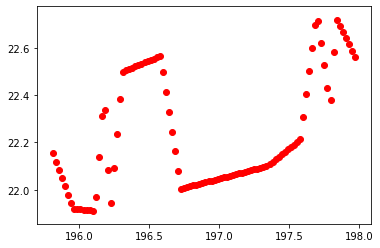

49.obj


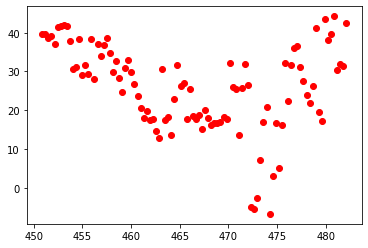

2.obj


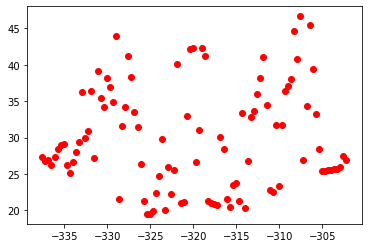

91.obj


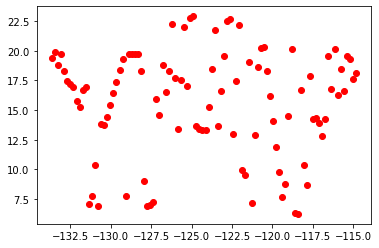

87.obj


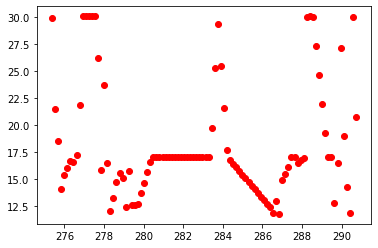

126.obj


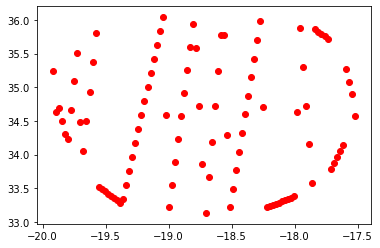

11.obj


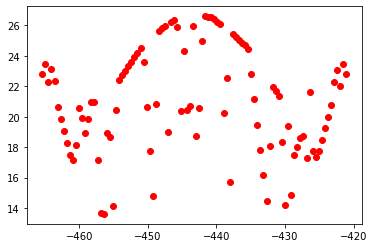

26.obj


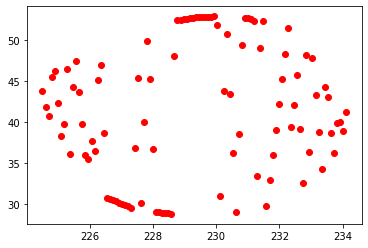

180.obj


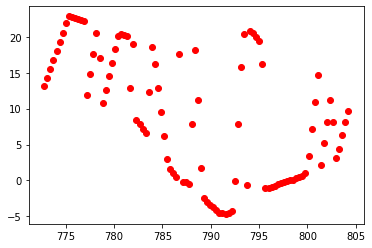

42.obj


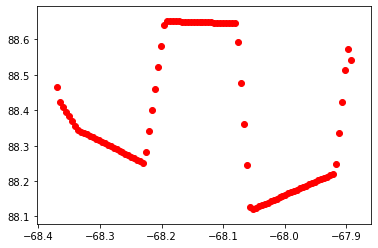

200.obj


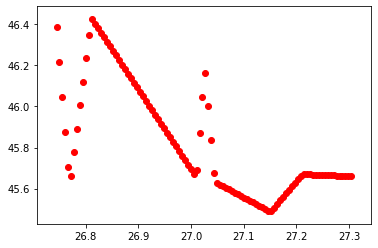

95.obj


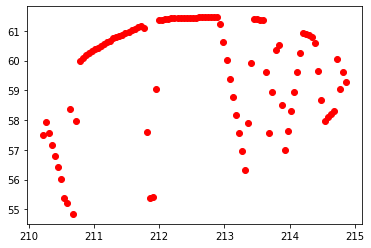

90.obj


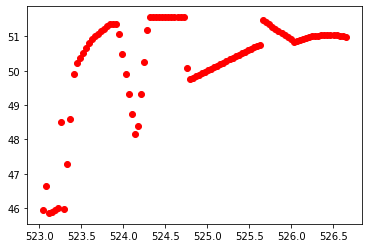

128.obj


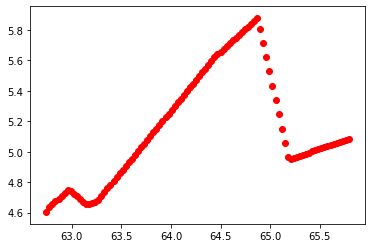

25.obj


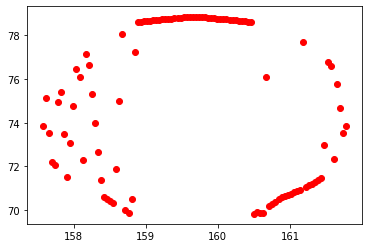

107.obj


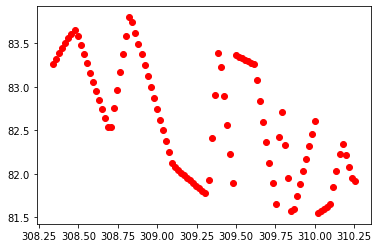

188.obj


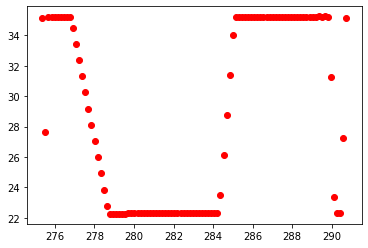

62.obj


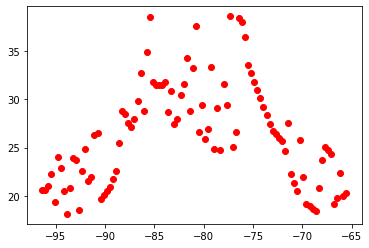

159.obj


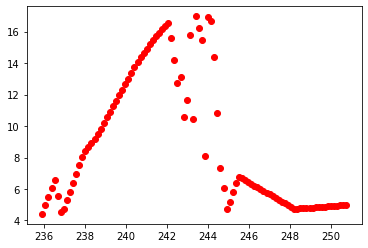

56.obj


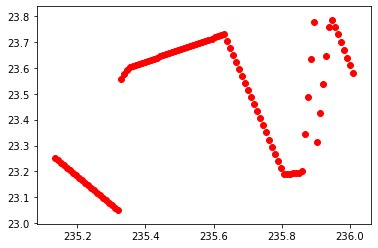

110.obj


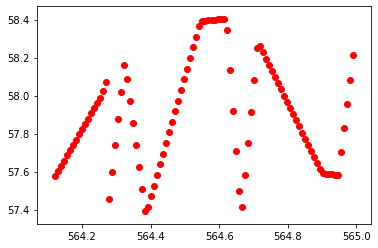

109.obj


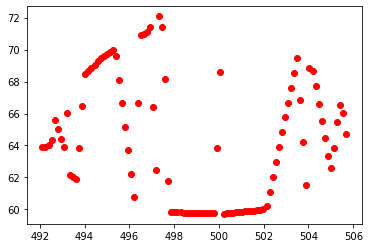

61.obj


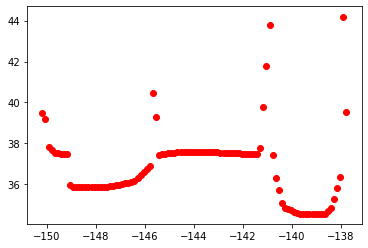

84.obj


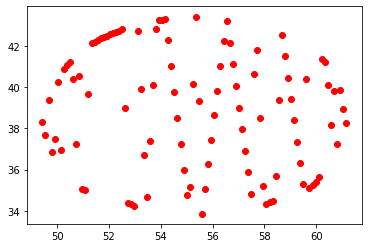

121.obj


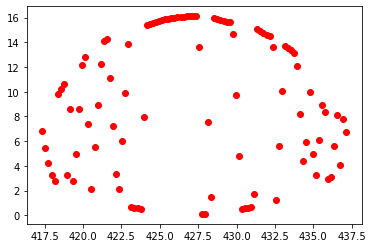

73.obj


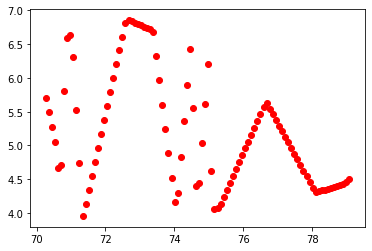

19.obj


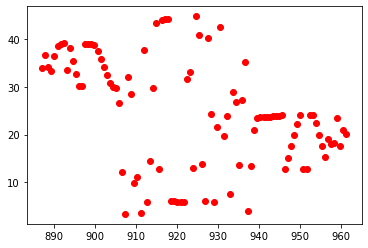

17.obj


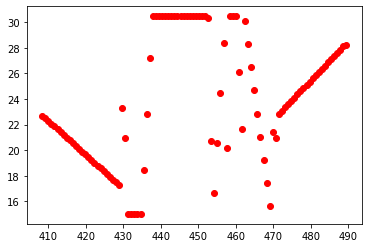

45.obj


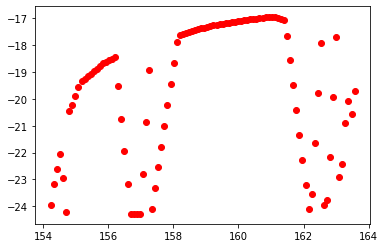

79.obj


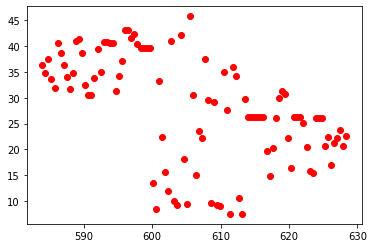

100.obj


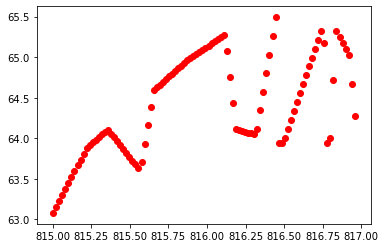

127.obj


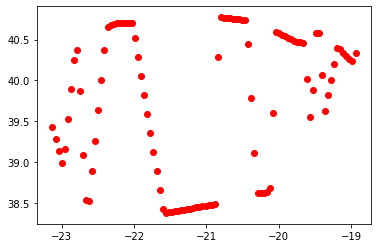

70.obj


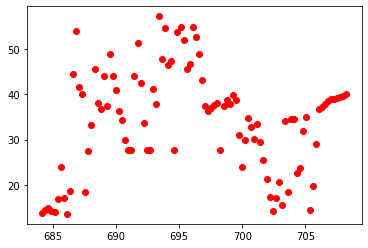

102.obj


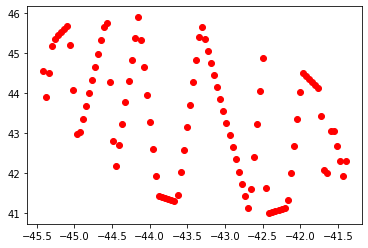

131.obj


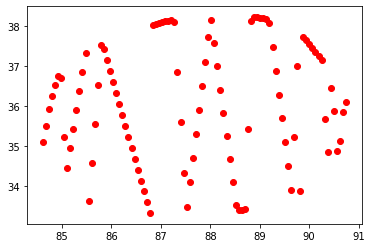

30.obj


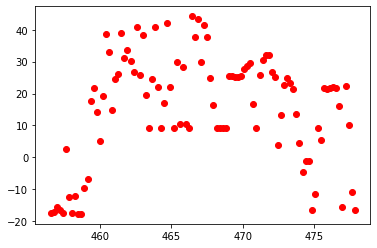

43.obj


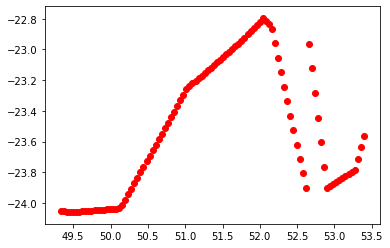

149.obj


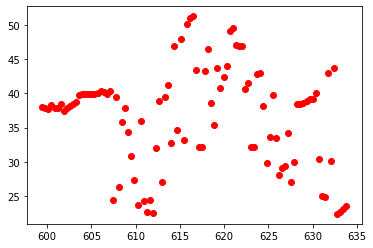

50.obj


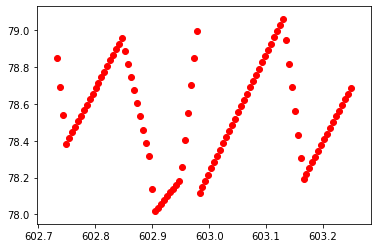

77.obj


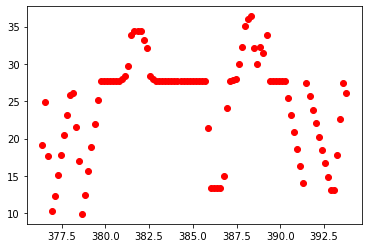

1.obj


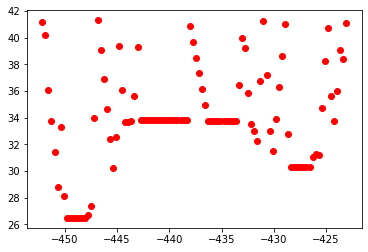

151.obj


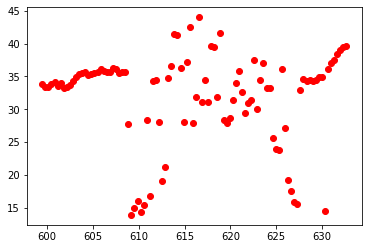

64.obj


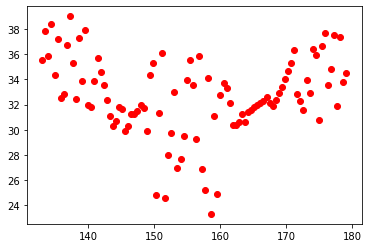

65.obj


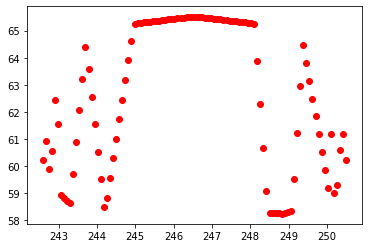

136.obj


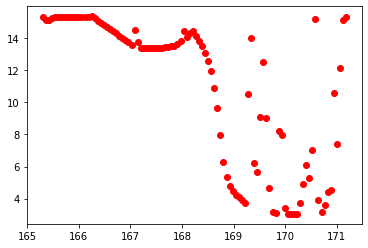

162.obj


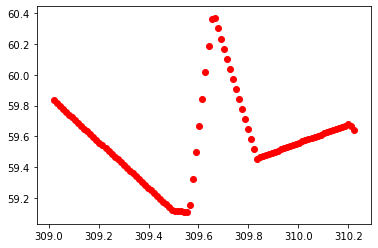

103.obj


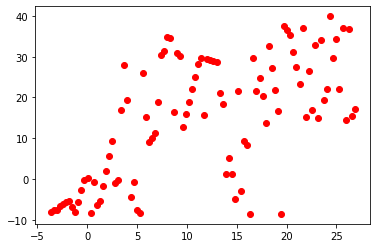

54.obj


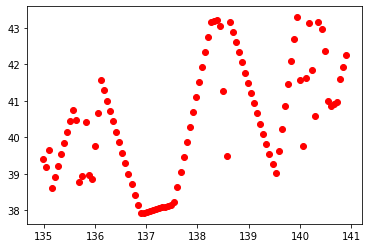

52.obj


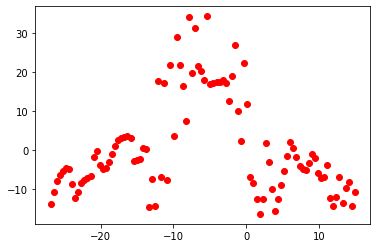

24.obj


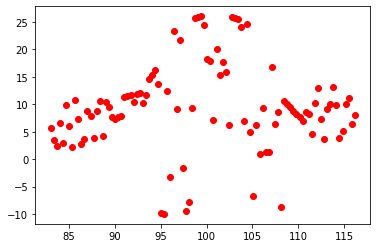

78.obj


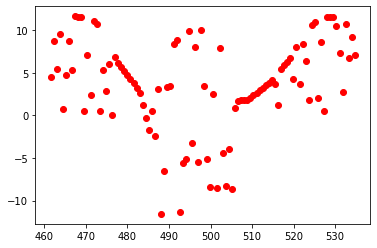

32.obj


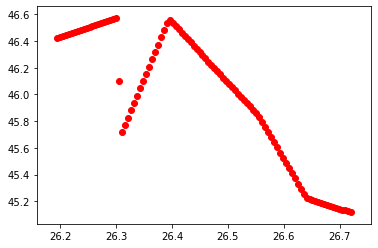

172.obj


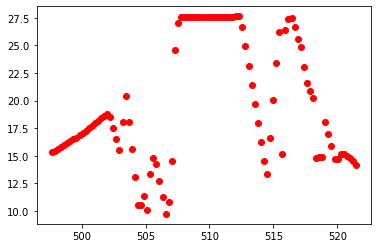

197.obj


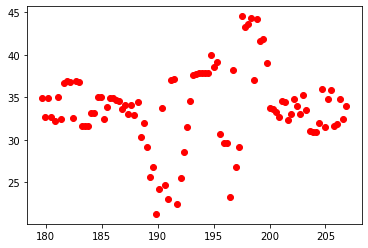

190.obj


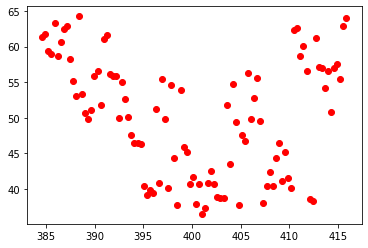

69.obj


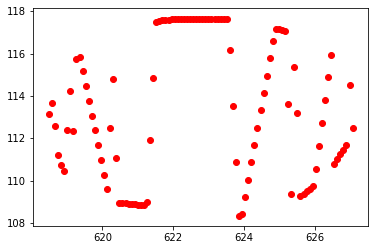

75.obj


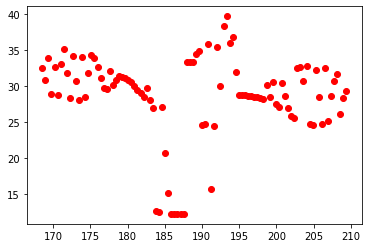

169.obj


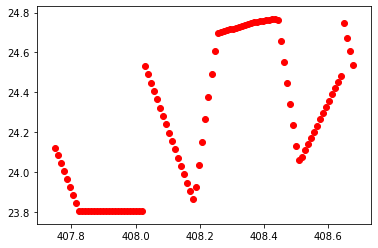

161.obj


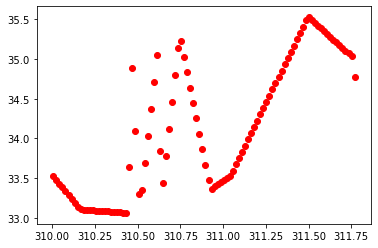

140.obj


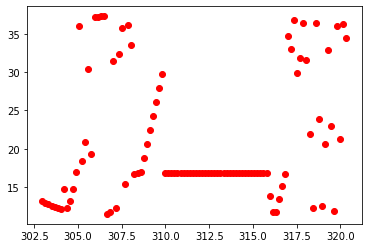

105.obj


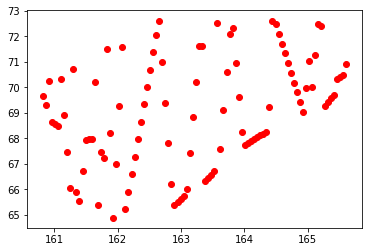

22.obj


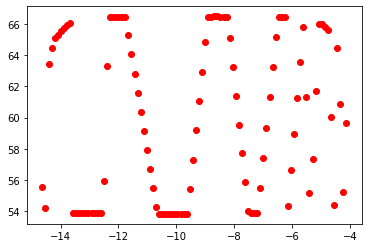

145.obj


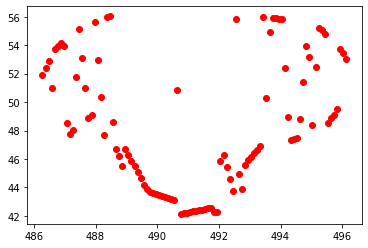

154.obj


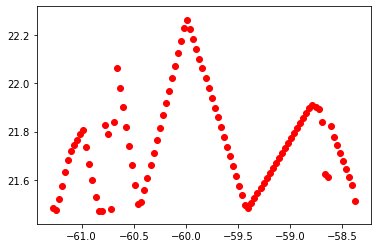

170.obj


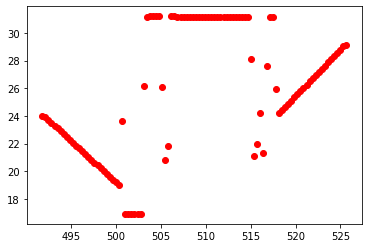

119.obj


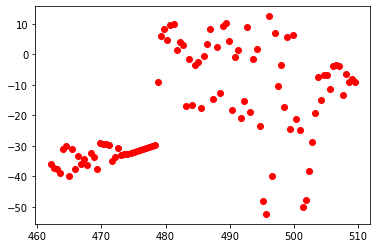

130.obj


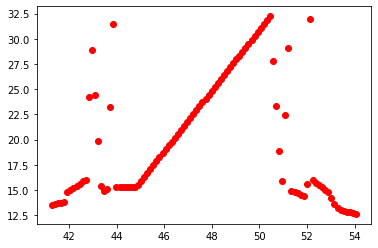

29.obj


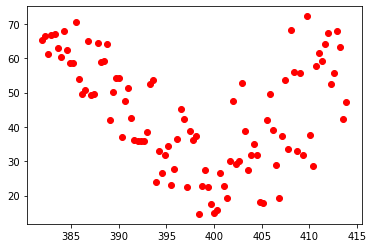

31.obj


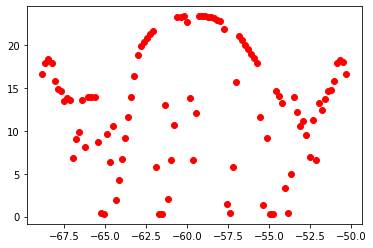

20.obj


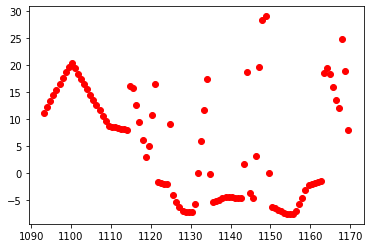

144.obj


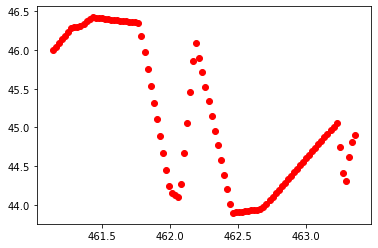

37.obj


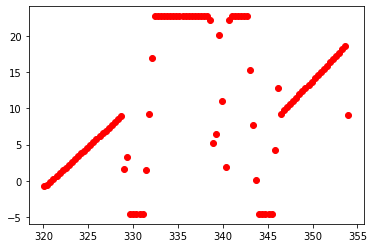

33.obj


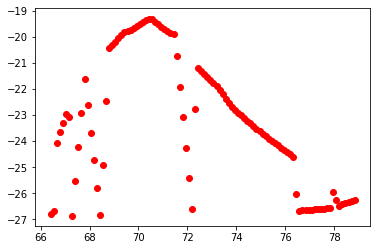

6.obj


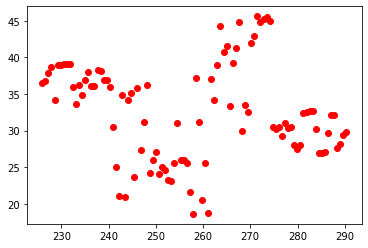

41.obj


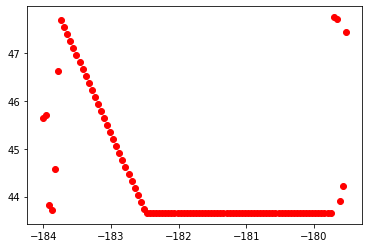

86.obj


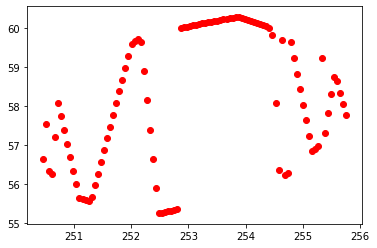

183.obj


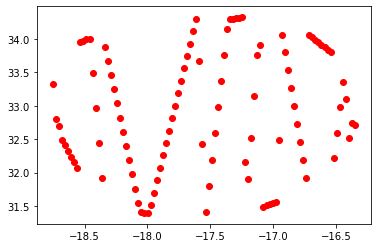

34.obj


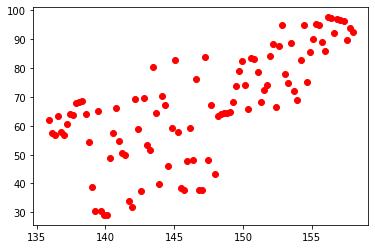

199.obj


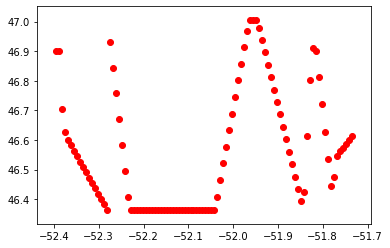

58.obj


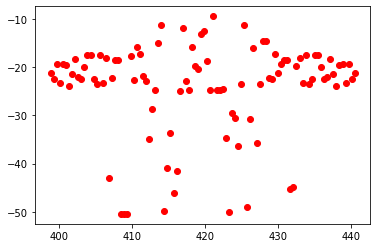

7.obj


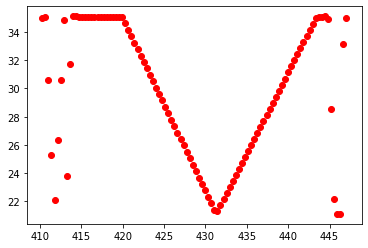

157.obj


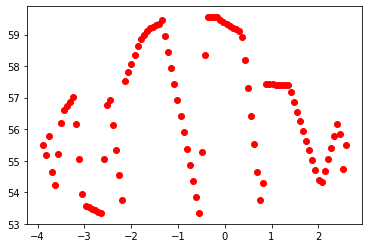

177.obj


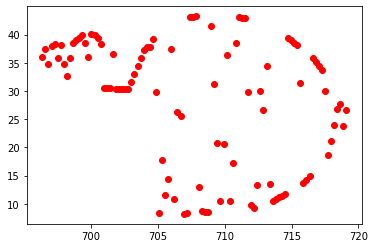

51.obj


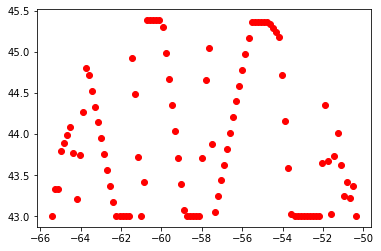

18.obj


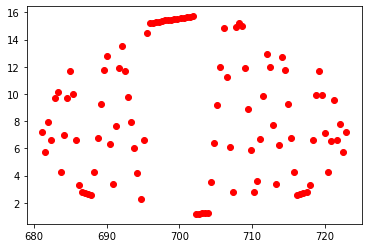

14.obj


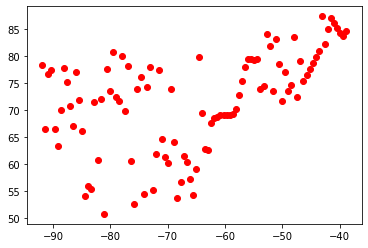

98.obj


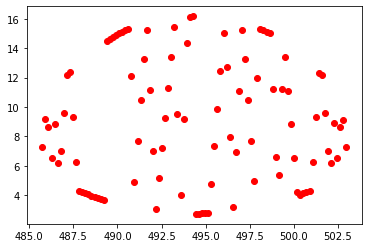

76.obj


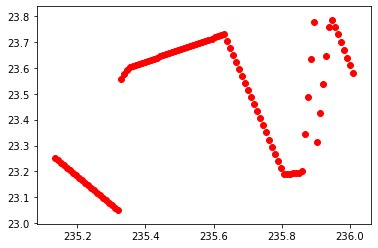

187.obj


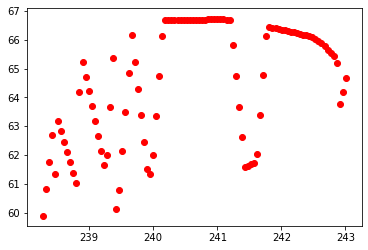

165.obj


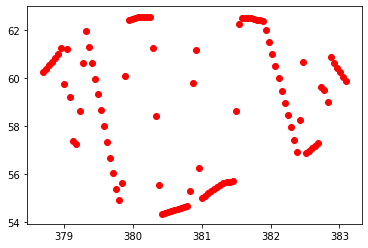

13.obj


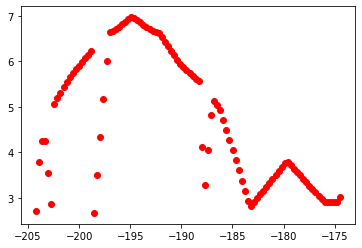

134.obj


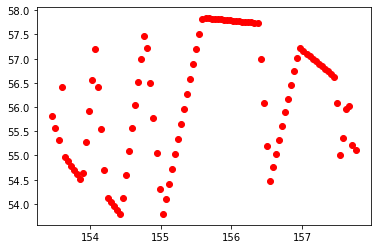

186.obj


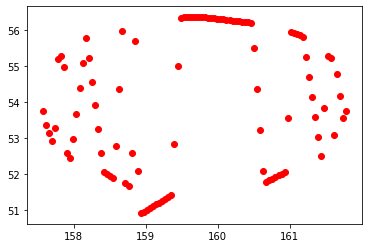

72.obj


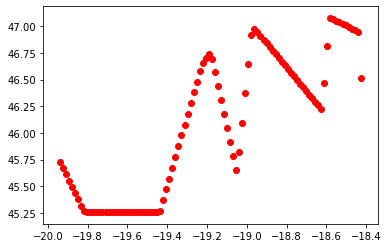

167.obj


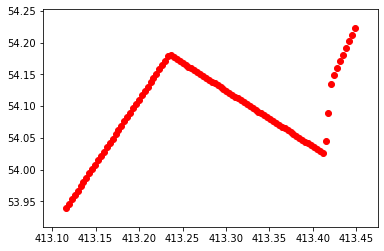

185.obj


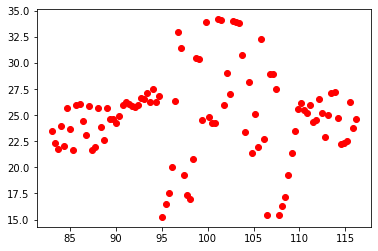

15.obj


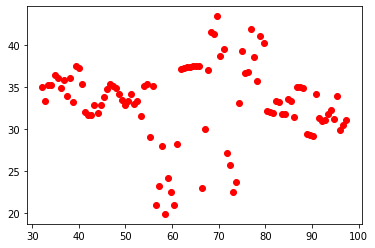

153.obj


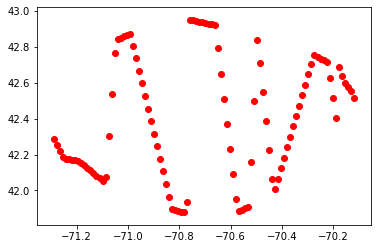

124.obj


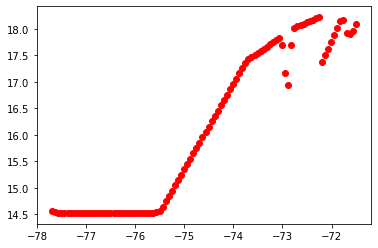

171.obj


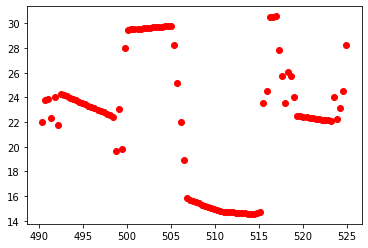

196.obj


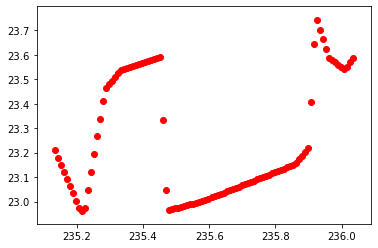

168.obj


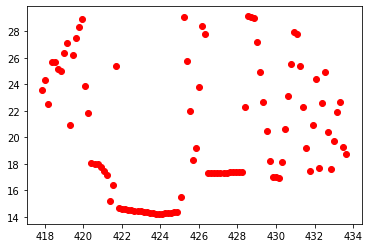

137.obj


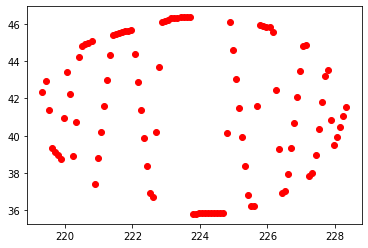

173.obj


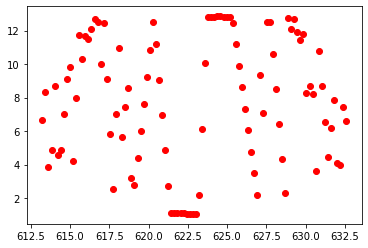

101.obj


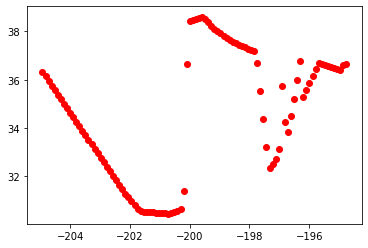

139.obj


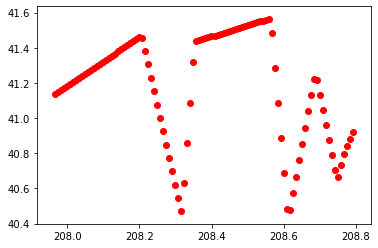

129.obj


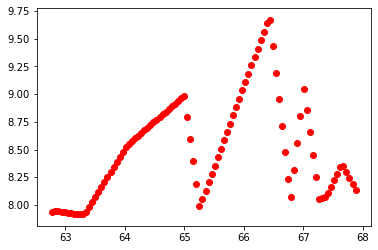

21.obj


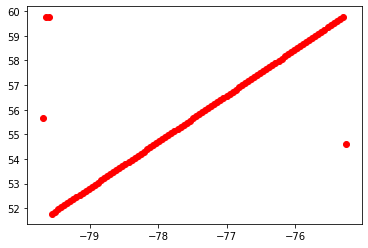

12.obj


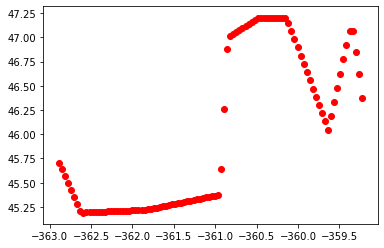

114.obj


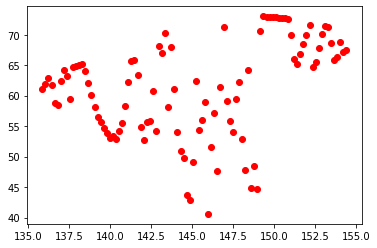

156.obj


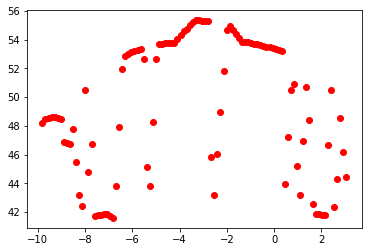

147.obj


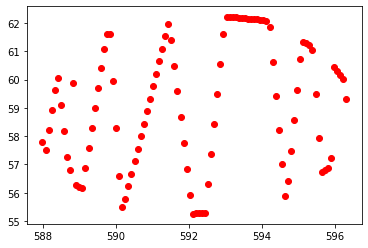

176.obj


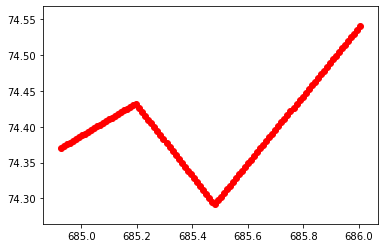

106.obj


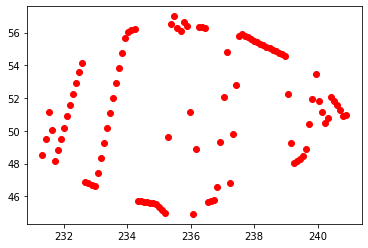

125.obj


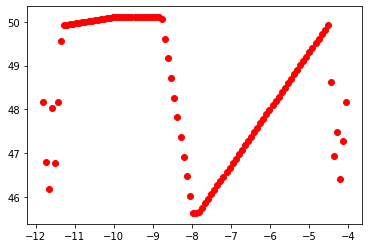

135.obj


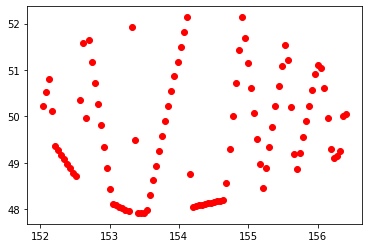

85.obj


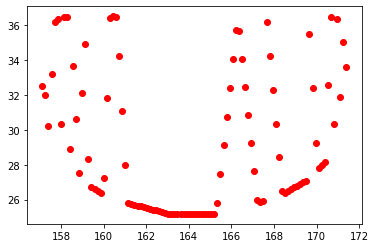

5.obj


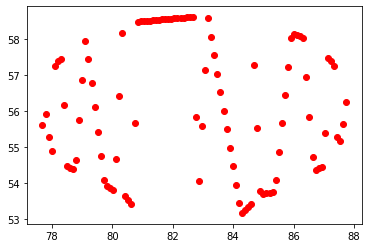

112.obj


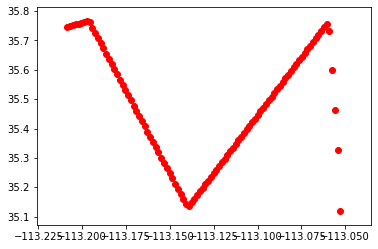

40.obj


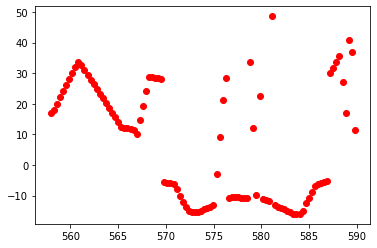

133.obj


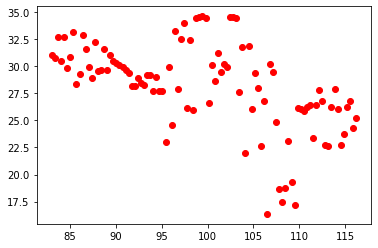

97.obj


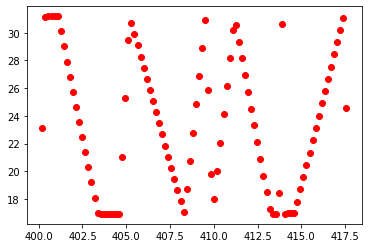

174.obj


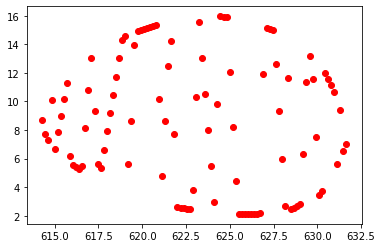

3.obj


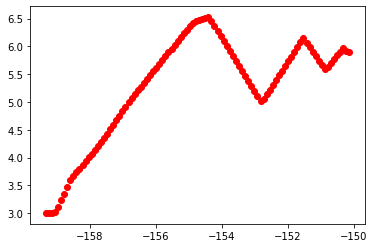

44.obj


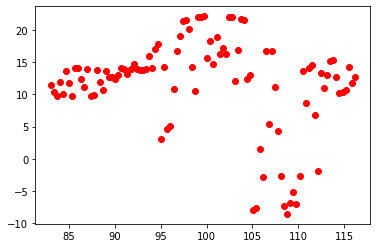

83.obj


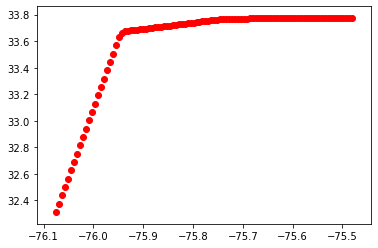

82.obj


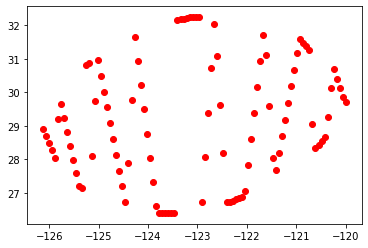

198.obj


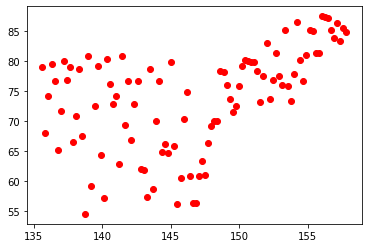

38.obj


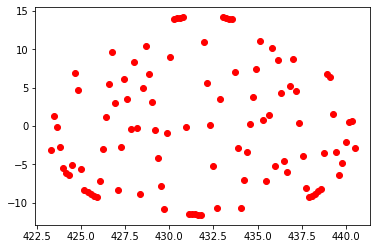

184.obj


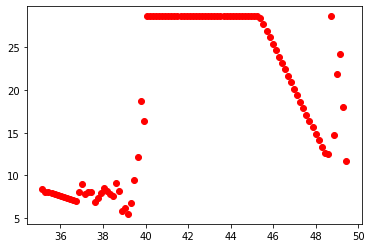

143.obj


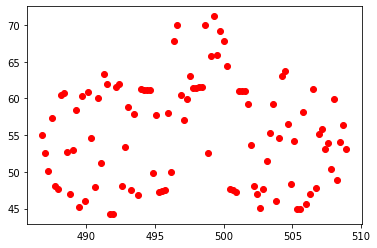

71.obj


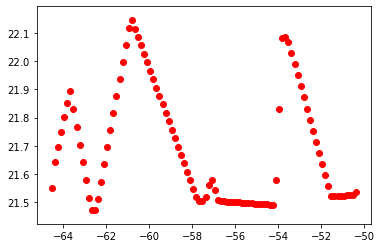

47.obj


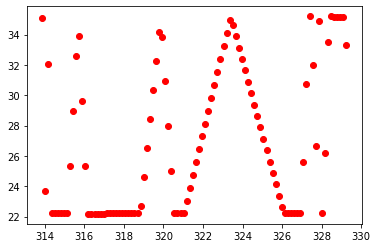

123.obj


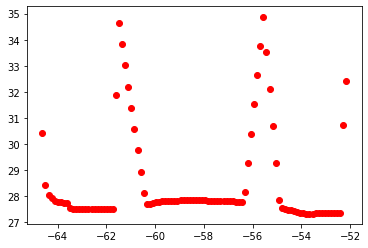

148.obj


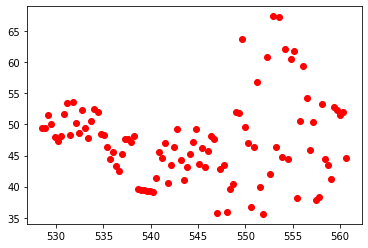

104.obj


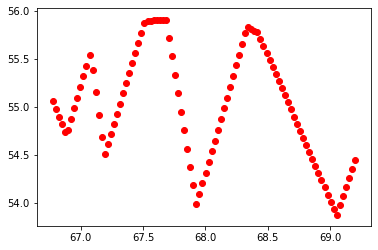

9.obj


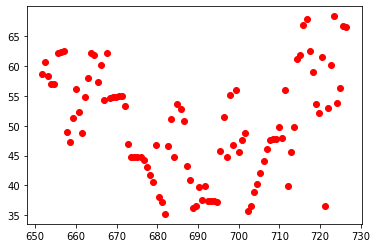

39.obj


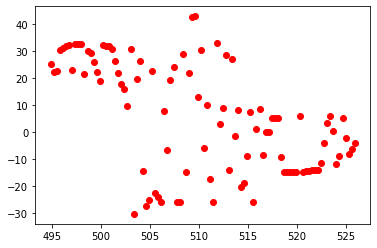

194.obj


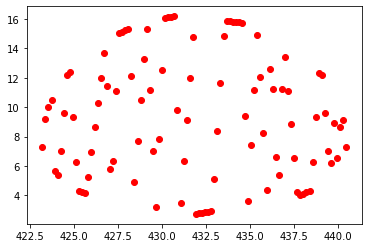

160.obj


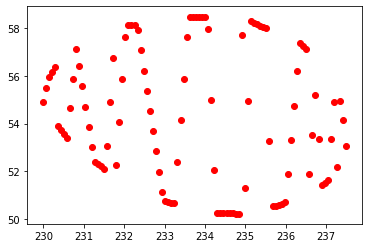

Mean n lines: 75.5680473372781


In [101]:

def isObj(filename):
    return len(filename.split('.')) == 2 and filename.split('.')[1] == 'obj'

# isObj('1.obj')

directory = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train')
labelsDir = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train', 'labels')
o2v = Obj2MeshVerts()
osl = ObjSlicer()

fig = plt.figure()

i = 0
sum = 0
for filename in os.listdir(directory):
    if isObj(filename):
        print(filename)
        fileId = filename.split('.')[0]
        # print(fileId)
        filePath = os.path.join(directory, filename)
        cutting_plane_norm = (0, 0, 1)
        P = osl.singleSlice(filePath, cutting_plane_norm)
        # print(f'n lines: {len(P)}')
        p = P[0]

        #Interpolate n points in lines to fixed number
        p = p[p[:, 0].argsort()] # Sort p by 1st column (x's), this way we can interpolate y's and z's to desired length
        # print(p)
        # x = p[:,0]
        # print(x)
        # y = p[:,1]
        # z = p[:,2]

        # yposi = np.argwhere(y > 0)
        # print(f'yposi: {yposi}')
        # ynegi = np.argwhere(y <= 0)

        # zposi = np.argwhere(z > 0)
        # znegi = np.argwhere(z <= 0)

        

        # xi = np.linspace(min(x), max(x), num=100)

        # # print(y[yposi].shape)
        # ypos = np.interp(xi, x[yposi].reshape((yposi.shape[0])), y[yposi].reshape((yposi.shape[0])))
        # print(ynegi.size)

        # if not ynegi.size:
        #     # yneg = np.array([])
        #     y_new = ypos
        # else:
        #     yneg = np.interp(xi, x[ynegi].reshape((ynegi.shape[0])), y[ynegi].reshape((ynegi.shape[0])))
        #     y_new = np.concatenate((np.fliplr(yneg), ypos))

        # zpos = np.interp(xi, x[zposi].reshape((zposi.shape[0])), z[zposi].reshape((zposi.shape[0])))

        # if not znegi.size:
        #     # zneg = np.array([])
        #     z_new = zpos
        # else:
        #     zneg = np.interp(xi, x[znegi].reshape((znegi.shape[0])), z[znegi].reshape((znegi.shape[0])))
        #     print(f'zneg shape: {zneg}')
        #     z_new = np.concatenate((np.fliplr(zneg), zpos))

        # # print(yneg.shape)
        # # print(ypos.shape)
        # print(xi)
        # # np.fliplr(xi)
        # # y_new = np.concatenate((np.fliplr(yneg), ypos))
        # x_new = np.concatenate((np.flip(xi), xi))
        # z_new = np.concatenate((np.fliplr(zneg), zpos))

        px = np.linspace(min(p[:, 0]), max(p[:, 0]), num=100)
        py = np.interp(px, p[:, 0], p[:, 1])
        pz = np.interp(px, p[:, 0], p[:, 2])

        # print(f'px: {px.shape}')
        # print(f'py: {py.shape}')
        # print(f'pz: {pz.shape}')

        sum += p.shape[0]
        # px += np.min(px)
        # py += np.min(py)
        ax = plt.axes()
        ax.scatter(px, py, c='r')

        labelFile = os.path.join(labelsDir, fileId+'.npy')
        np.save(labelFile, np.array([px, py]))
        # ax.scatter(p[:, 0], p[:, 1], c='b')
        # ax.plot(p[:, 0], p[:, 1], c='b')
        # ax = plt.axes(projection='3d')
        # ax.scatter(px, py, pz, c='r')
        # ax.scatter(p[:, 0], p[:, 1], p[:, 2], c='b')
        x = p[:,0]
        y = p[:,1]
        # ax.plot((x-np.min(x))/(np.max(x)-np.min(x)), (y-np.min(y))/(np.max(y)-np.min(y)))

        plt.show()
        i+=1
        # for p in P:
        #     ax.plot(p[:, 0], p[:, 1], p[:, 2])
        #     plt.show()
print(f'Mean n lines: {sum/i}')


In [53]:
np.argwhere(p>0)


array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 1,  0],
       [ 1,  1],
       [ 1,  2],
       [ 2,  0],
       [ 2,  1],
       [ 2,  2],
       [ 3,  0],
       [ 3,  1],
       [ 3,  2],
       [ 4,  0],
       [ 4,  1],
       [ 4,  2],
       [ 5,  0],
       [ 5,  1],
       [ 5,  2],
       [ 6,  0],
       [ 6,  1],
       [ 6,  2],
       [ 7,  0],
       [ 7,  1],
       [ 7,  2],
       [ 8,  0],
       [ 8,  1],
       [ 8,  2],
       [ 9,  0],
       [ 9,  1],
       [ 9,  2],
       [10,  0],
       [10,  1],
       [10,  2],
       [11,  0],
       [11,  1],
       [11,  2],
       [12,  0],
       [12,  1],
       [12,  2],
       [13,  0],
       [13,  1],
       [13,  2],
       [14,  0],
       [14,  1],
       [14,  2],
       [15,  0],
       [15,  1],
       [15,  2],
       [16,  0],
       [16,  1],
       [16,  2],
       [17,  0],
       [17,  1],
       [17,  2],
       [18,  0],
       [18,  1],
       [18,  2],
       [19,  0],
       [19,  1

In [43]:
psorted = p.copy()

ps = psorted[psorted[:, 0].argsort()]
ps



array([[114.988     ,  29.8148    , 271.681     ],
       [115.12460105,  30.82720262, 271.681     ],
       [115.32885538,  31.38161885, 271.681     ],
       [115.35554696,  28.84063186, 271.681     ],
       [115.59470444,  28.26657841, 271.681     ],
       [115.82936481,  32.12079327, 271.681     ],
       [116.25652731,  27.30101137, 271.681     ],
       [116.54305326,  26.95568646, 271.681     ],
       [116.78379019,  32.7963291 , 271.681     ],
       [116.79353694,  26.71261332, 271.681     ],
       [117.05928836,  33.00382852, 271.681     ],
       [117.32217731,  33.06198555, 271.681     ],
       [117.98679935,  25.63917864, 271.681     ],
       [118.25458003,  25.51713772, 271.681     ],
       [118.59828814,  33.39486893, 271.681     ],
       [119.07926979,  33.35529736, 271.681     ],
       [119.29042736,  25.1320666 , 271.681     ],
       [119.90797931,  25.10516034, 271.681     ],
       [119.91809879,  25.10714637, 271.681     ],
       [119.92077974,  33.22896

In [12]:
filePath = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train', '1.obj')
o2v = Obj2verts()
geometry = o2v.readFile(filePath)
# print(len(geometry.v))
# print(geometry.v)


# Input features

In [3]:


directory = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train')
featuresDir = os.path.join(os.getcwd(), 'data', 'coseg', 'coseg_aliens', 'train', 'features')

for filename in os.listdir(directory):
    if isObj(filename):
        print(filename)
        fileId = filename.split('.')[0]
        # print(fileId)
        filePath = os.path.join(directory, filename)
        

        o2v = Obj2verts()
        geometry = o2v.readFile(filePath)
        features = geometry.calculateFeatures()
        
        featureFile = os.path.join(featuresDir, fileId+'.npy')
        np.save(featureFile, features)
# geometry.calculateFeatures(edges)
# edges



Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

94.obj
94


Finding Edges...:   0%|          | 2/1500 [00:00<01:28, 16.88it/s]

141.obj
141


Finding Edges...:   0%|          | 3/1500 [00:00<01:05, 22.98it/s]

115.obj
115


Finding Edges...:   0%|          | 2/1500 [00:00<02:15, 11.07it/s]

108.obj
108


Finding Edges...:   0%|          | 3/1500 [00:00<01:05, 22.85it/s]

155.obj
155


Finding Edges...:   0%|          | 3/1500 [00:00<01:14, 20.06it/s]

59.obj
59


Finding Edges...:   0%|          | 3/1500 [00:00<01:27, 17.16it/s]

193.obj
193


Finding Edges...:   0%|          | 3/1500 [00:00<01:10, 21.38it/s]

158.obj
158


Finding Edges...:   0%|          | 3/1500 [00:00<01:03, 23.74it/s]

181.obj
181


Finding Edges...:   0%|          | 2/1500 [00:00<01:43, 14.43it/s]

122.obj
122


Finding Edges...:   0%|          | 2/1500 [00:00<01:43, 14.46it/s]

116.obj
116


Finding Edges...:   0%|          | 3/1500 [00:00<01:08, 21.94it/s]

68.obj
68


Finding Edges...:   0%|          | 2/1499 [00:00<01:49, 13.71it/s]

57.obj
57


Finding Edges...:   0%|          | 2/1500 [00:00<01:44, 14.34it/s]

88.obj
88


Finding Edges...:   0%|          | 3/1500 [00:00<01:08, 21.93it/s]

138.obj
138


Finding Edges...:   0%|          | 2/1500 [00:00<01:15, 19.96it/s]

152.obj
152


Finding Edges...:   0%|          | 3/1500 [00:00<01:14, 20.09it/s]

4.obj
4


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

113.obj
113


Finding Edges...:   0%|          | 2/1500 [00:00<01:33, 16.04it/s]

8.obj
8


Finding Edges...:   0%|          | 3/1500 [00:00<01:02, 24.03it/s]

66.obj
66


Finding Edges...:   0%|          | 2/1500 [00:00<01:27, 17.08it/s]

48.obj
48


Finding Edges...:   0%|          | 3/1500 [00:00<01:14, 19.96it/s]

74.obj
74


Finding Edges...:   0%|          | 3/1500 [00:00<01:05, 22.96it/s]

81.obj
81


Finding Edges...:   0%|          | 2/1500 [00:00<01:21, 18.33it/s]

67.obj
67


Finding Edges...:   0%|          | 3/1500 [00:00<01:27, 17.15it/s]

27.obj
27


Finding Edges...:   0%|          | 2/1500 [00:00<01:43, 14.51it/s]

164.obj
164


Finding Edges...:   0%|          | 2/1500 [00:00<01:17, 19.25it/s]

175.obj
175


Finding Edges...:   0%|          | 2/1500 [00:00<01:15, 19.77it/s]

46.obj
46


Finding Edges...:   0%|          | 2/1500 [00:00<01:55, 12.93it/s]

96.obj
96


Finding Edges...:   0%|          | 3/1500 [00:00<01:06, 22.44it/s]

16.obj
16


Finding Edges...:   0%|          | 2/1500 [00:00<01:54, 13.05it/s]

49.obj
49


Finding Edges...:   0%|          | 3/1500 [00:00<01:07, 22.09it/s]

2.obj
2


Finding Edges...:   0%|          | 3/1500 [00:00<01:24, 17.79it/s]

91.obj
91


Finding Edges...:   0%|          | 3/1500 [00:00<01:12, 20.64it/s]

87.obj
87


Finding Edges...:   0%|          | 2/1500 [00:00<01:45, 14.18it/s]

126.obj
126


Finding Edges...:   0%|          | 3/1500 [00:00<00:59, 25.06it/s]

11.obj
11


Finding Edges...:   0%|          | 3/1500 [00:00<01:28, 16.89it/s]

26.obj
26


Finding Edges...:   0%|          | 2/1500 [00:00<01:45, 14.15it/s]

180.obj
180


Finding Edges...:   0%|          | 3/1500 [00:00<01:05, 22.76it/s]

42.obj
42


Finding Edges...:   0%|          | 2/1500 [00:00<01:51, 13.42it/s]

200.obj
200


Finding Edges...:   0%|          | 3/1500 [00:00<01:02, 24.12it/s]

95.obj
95


Finding Edges...:   0%|          | 2/1500 [00:00<01:17, 19.33it/s]

90.obj
90


Finding Edges...:   0%|          | 2/1500 [00:00<01:58, 12.69it/s]

128.obj
128


Finding Edges...:   0%|          | 2/1500 [00:00<02:07, 11.79it/s]

25.obj
25


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

107.obj
107


Finding Edges...:   0%|          | 2/1500 [00:00<01:38, 15.26it/s]

188.obj
188


Finding Edges...:   0%|          | 2/1500 [00:00<01:17, 19.21it/s]

62.obj
62


Finding Edges...:   0%|          | 2/1500 [00:00<01:47, 13.87it/s]

159.obj
159


Finding Edges...:   0%|          | 2/1500 [00:00<02:03, 12.17it/s]

56.obj
56


Finding Edges...:   0%|          | 2/1500 [00:00<01:34, 15.92it/s]

110.obj
110


Finding Edges...:   0%|          | 2/1500 [00:00<01:46, 14.03it/s]

109.obj
109


Finding Edges...:   0%|          | 3/1500 [00:00<01:03, 23.58it/s]

61.obj
61


Finding Edges...:   0%|          | 3/1500 [00:00<01:02, 23.96it/s]

84.obj
84


Finding Edges...:   0%|          | 1/1500 [00:00<02:35,  9.64it/s]

121.obj
121


Finding Edges...:   0%|          | 1/1500 [00:00<02:51,  8.75it/s]

73.obj
73


Finding Edges...:   0%|          | 2/1500 [00:00<02:15, 11.04it/s]

19.obj
19


Finding Edges...:   0%|          | 3/1500 [00:00<01:04, 23.12it/s]

17.obj
17


Finding Edges...:   0%|          | 3/1500 [00:00<01:03, 23.45it/s]

45.obj
45


Finding Edges...:   0%|          | 2/1500 [00:00<01:38, 15.14it/s]

79.obj
79


Finding Edges...:   0%|          | 2/1500 [00:00<01:30, 16.53it/s]

100.obj
100


Finding Edges...:   0%|          | 2/1500 [00:00<02:00, 12.47it/s]

127.obj
127


Finding Edges...:   0%|          | 3/1500 [00:00<01:01, 24.29it/s]

70.obj
70


Finding Edges...:   0%|          | 3/1500 [00:00<01:21, 18.34it/s]

102.obj
102


Finding Edges...:   0%|          | 2/1500 [00:00<02:11, 11.43it/s]

131.obj
131


Finding Edges...:   0%|          | 2/1500 [00:00<01:53, 13.14it/s]

30.obj
30


Finding Edges...:   0%|          | 3/1500 [00:00<01:20, 18.48it/s]

43.obj
43


Finding Edges...:   0%|          | 3/1500 [00:00<01:08, 21.89it/s]

149.obj
149


Finding Edges...:   0%|          | 2/1500 [00:00<02:02, 12.22it/s]

50.obj
50


Finding Edges...:   0%|          | 2/1500 [00:00<02:00, 12.48it/s]

77.obj
77


Finding Edges...:   0%|          | 2/1500 [00:00<01:32, 16.23it/s]

1.obj
1


Finding Edges...:   0%|          | 2/1500 [00:00<01:34, 15.83it/s]

151.obj
151


Finding Edges...:   0%|          | 2/1500 [00:00<01:49, 13.64it/s]

64.obj
64


Finding Edges...:   0%|          | 3/1500 [00:00<01:28, 16.83it/s]

65.obj
65


Finding Edges...:   0%|          | 2/1499 [00:00<01:26, 17.28it/s]

136.obj
136


Finding Edges...:   0%|          | 2/1500 [00:00<02:04, 12.04it/s]

162.obj
162


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

103.obj
103


Finding Edges...:   0%|          | 2/1500 [00:00<01:24, 17.74it/s]

54.obj
54


Finding Edges...:   0%|          | 2/1500 [00:00<01:34, 15.93it/s]

52.obj
52


Finding Edges...:   0%|          | 2/1500 [00:00<01:32, 16.27it/s]

24.obj
24


Finding Edges...:   0%|          | 2/1500 [00:00<02:14, 11.17it/s]

78.obj
78


Finding Edges...:   0%|          | 3/1500 [00:00<01:06, 22.48it/s]

32.obj
32


Finding Edges...:   0%|          | 3/1500 [00:00<01:07, 22.20it/s]

172.obj
172


Finding Edges...:   0%|          | 2/1500 [00:00<01:29, 16.72it/s]

197.obj
197


Finding Edges...:   0%|          | 3/1500 [00:00<01:21, 18.44it/s]

190.obj
190


Finding Edges...:   0%|          | 2/1500 [00:00<02:02, 12.20it/s]

69.obj
69


Finding Edges...:   0%|          | 2/1500 [00:00<02:01, 12.32it/s]

75.obj
75


Finding Edges...:   0%|          | 3/1500 [00:00<01:03, 23.60it/s]

169.obj
169


Finding Edges...:   0%|          | 3/1500 [00:00<01:03, 23.71it/s]

161.obj
161


Finding Edges...:   0%|          | 2/1500 [00:00<02:04, 12.02it/s]

140.obj
140


Finding Edges...:   0%|          | 2/1500 [00:00<01:21, 18.40it/s]

105.obj
105


Finding Edges...:   0%|          | 2/1500 [00:00<02:07, 11.72it/s]

22.obj
22


Finding Edges...:   0%|          | 2/1500 [00:00<01:42, 14.55it/s]

145.obj
145


Finding Edges...:   0%|          | 2/1500 [00:00<01:22, 18.12it/s]

154.obj
154


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

170.obj
170


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

119.obj
119


Finding Edges...:   0%|          | 2/1499 [00:00<01:43, 14.52it/s]

130.obj
130


Finding Edges...:   0%|          | 3/1500 [00:00<01:07, 22.24it/s]

29.obj
29


Finding Edges...:   0%|          | 1/1500 [00:00<02:57,  8.47it/s]

31.obj
31


Finding Edges...:   0%|          | 2/1500 [00:00<01:32, 16.24it/s]

20.obj
20


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

144.obj
144


Finding Edges...:   0%|          | 3/1500 [00:00<01:06, 22.45it/s]

37.obj
37


Finding Edges...:   0%|          | 2/1500 [00:00<02:11, 11.38it/s]

33.obj
33


Finding Edges...:   0%|          | 2/1500 [00:00<01:23, 17.85it/s]

6.obj
6


Finding Edges...:   0%|          | 3/1500 [00:00<01:02, 23.77it/s]

41.obj
41


Finding Edges...:   0%|          | 2/1500 [00:00<01:23, 17.84it/s]

86.obj
86


Finding Edges...:   0%|          | 0/1500 [00:00<?, ?it/s]

183.obj
183


Calculating Features...: 100%|██████████| 4500/4500 [00:02<00:00, 2073.68it/s]

features
features


IsADirectoryError: [Errno 21] Is a directory: '/home/pascal/3D_slAIcer/data/coseg/coseg_aliens/train/features'

94.obj
141.obj
115.obj
108.obj
155.obj
59.obj
193.obj
158.obj
181.obj
122.obj
116.obj
68.obj
57.obj
88.obj
138.obj
152.obj
4.obj
113.obj
8.obj
66.obj
48.obj
74.obj
81.obj
67.obj
27.obj
164.obj
175.obj
46.obj
96.obj
16.obj
49.obj
2.obj
91.obj
87.obj
126.obj
11.obj
26.obj
180.obj
42.obj
200.obj
95.obj
90.obj
128.obj
25.obj
107.obj
188.obj
62.obj
159.obj
56.obj
110.obj
109.obj
61.obj
84.obj
121.obj
73.obj
19.obj
17.obj
45.obj
79.obj
100.obj
127.obj
70.obj
102.obj
131.obj
30.obj
43.obj
149.obj
50.obj
77.obj
1.obj
151.obj
64.obj
65.obj
136.obj
162.obj
103.obj
54.obj
52.obj
24.obj
78.obj
32.obj
172.obj
197.obj
190.obj
69.obj
75.obj
169.obj
161.obj
140.obj
105.obj
22.obj
145.obj
154.obj
170.obj
119.obj
130.obj
29.obj
31.obj
20.obj
144.obj
37.obj
33.obj
6.obj
41.obj
86.obj
183.obj
34.obj
199.obj
58.obj
7.obj
157.obj
177.obj
51.obj
18.obj
14.obj
98.obj
76.obj
187.obj
165.obj
13.obj
134.obj
186.obj
72.obj
167.obj
185.obj
15.obj
153.obj
124.obj
171.obj
196.obj
168.obj
137.obj
173.obj
101.obj
139.

In [136]:
import math
np.degrees(3.14159265)
g = float("{:.4f}".format(-1.0000000000000002))
np.arccos(g)

# a = 0.910221324013388510820732335560023784637451171875
# g = float("{:.2f}".format(a))
# g


3.141592653589793